# This Notebook is inspired by https://www.kaggle.com/deepakdodi 's public notebook on the same!

#  Importing all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid



from tensorflow import zeros
from tensorflow.data import Dataset
from tensorflow.keras import Sequential, backend
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop, SGD




In [2]:
trainbanking = pd.read_csv(r'/kaggle/input/playground-series-s4e1/train.csv')
testbanking = pd.read_csv(r'/kaggle/input/playground-series-s4e1/test.csv')


# Explorartory Data Analysis

In [3]:
trainbanking.drop(['id','CustomerId','Surname'], axis = 1, inplace = True)
testbanking_id = testbanking[['id']].copy()
testbanking.drop(['id','CustomerId','Surname'],axis = 1, inplace = True)

In [4]:
trainbanking.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
trainbanking.shape,testbanking.shape,testbanking_id.shape

((165034, 11), (110023, 10), (110023, 1))

In [6]:

trainbanking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [7]:
trainbanking.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [8]:
trainbanking.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
trainbanking.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

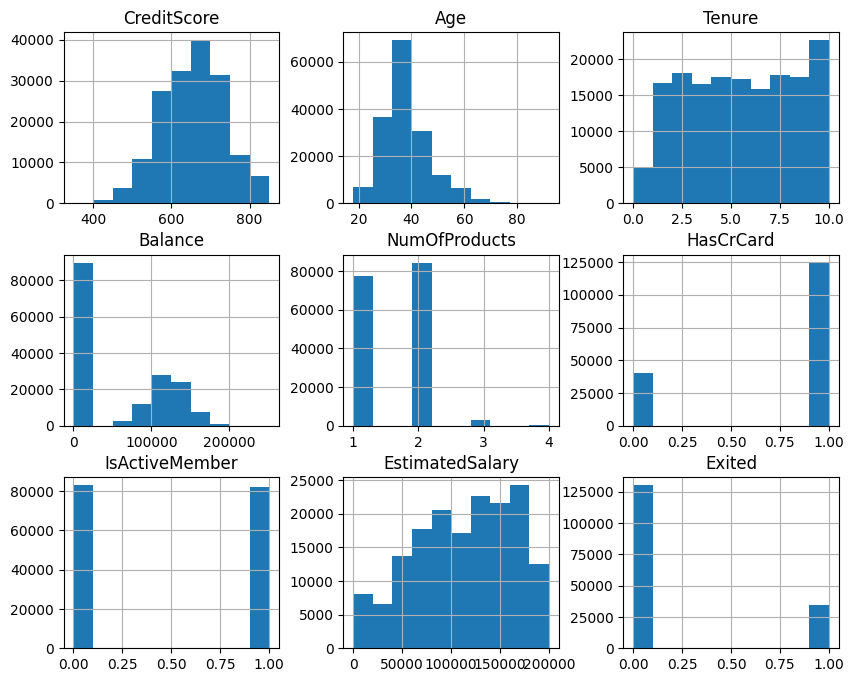

In [10]:
trainbanking.hist(figsize=(10,8))
plt.show()

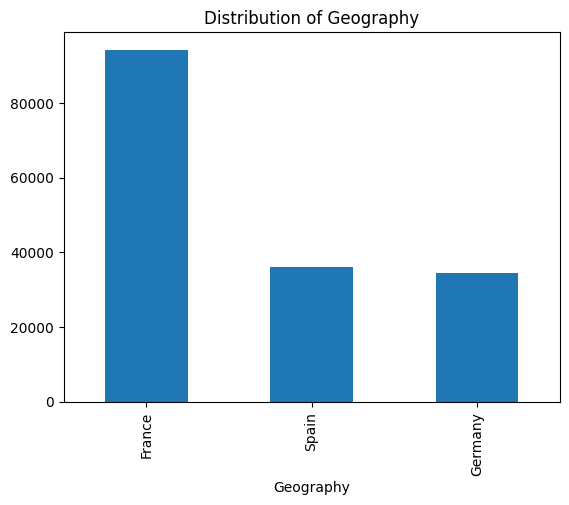

In [11]:
trainbanking['Geography'].value_counts().plot(kind ='bar')
plt.title('Distribution of Geography')
plt.show()

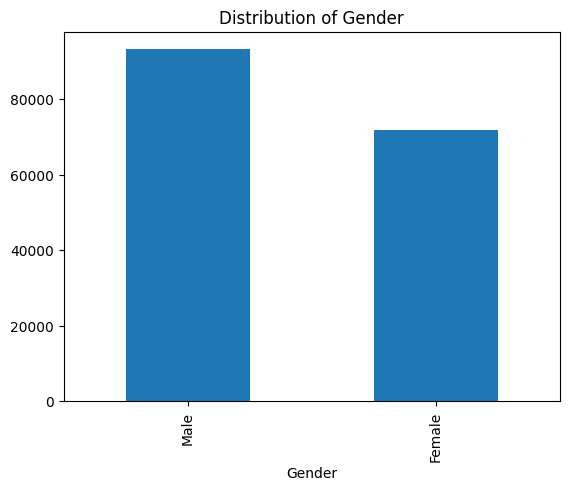

In [12]:
trainbanking['Gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender')
plt.show()


In [13]:
trainbankinggcounts = trainbanking['Geography'].value_counts()
print('Geography counts',trainbankinggcounts)
trainbankinggencounts = trainbanking['Gender'].value_counts()
print('Gender counts',trainbankinggencounts)

Geography counts Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64
Gender counts Gender
Male      93150
Female    71884
Name: count, dtype: int64


In [14]:
averageagebyexited = trainbanking.groupby('Exited')['Age'].mean()
print("\nAverage age by exited\n",averageagebyexited)


Average age by exited
 Exited
0    36.560480
1    43.958478
Name: Age, dtype: float64


In [15]:
activemember_exit_cross = pd.crosstab(trainbanking['IsActiveMember'],trainbanking['Exited'],normalize='index')*100
print("\n Cross tabulation between active member and exited \n",activemember_exit_cross)


 Cross tabulation between active member and exited 
 Exited                  0          1
IsActiveMember                      
0.0             70.291368  29.708632
1.0             87.465459  12.534541


In [16]:
hascard_exit_cross = pd.crosstab(trainbanking['HasCrCard'],trainbanking['Exited'],normalize='index')*100
print("\n Cross tabulation between has credit card and exited \n",hascard_exit_cross)


 Cross tabulation between has credit card and exited 
 Exited             0          1
HasCrCard                      
0.0        77.257056  22.742944
1.0        79.356736  20.643264


# Preparing the data

In [17]:
# Createing a label encoder
label_encoder = LabelEncoder()
trainbanking['Gender'] = label_encoder.fit_transform(trainbanking['Gender'])
testbanking['Gender'] = label_encoder.fit_transform(testbanking['Gender'])


In [18]:
trainbanking = pd.get_dummies(trainbanking, columns=['Geography'], prefix='Geography')
testbanking = pd.get_dummies(testbanking, columns=['Geography'], prefix='Geography')

trainbanking[['Geography_Germany', 'Geography_Spain','Geography_France']] = trainbanking[['Geography_Germany', 'Geography_Spain','Geography_France']].astype(int)
testbanking[['Geography_Germany', 'Geography_Spain','Geography_France']] = testbanking[['Geography_Germany', 'Geography_Spain','Geography_France']].astype(int)

In [19]:
trainbanking.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,668,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0
1,627,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0
2,678,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0
3,581,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0
4,716,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1


In [20]:
trainbanking['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [21]:
np.round(100*trainbanking['Exited'].value_counts(normalize = True),2)

Exited
0    78.84
1    21.16
Name: proportion, dtype: float64

In [22]:
X = trainbanking.drop("Exited", axis=1)  # Features
y = trainbanking["Exited"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,stratify=y)

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((148530, 12), (148530,), (16504, 12), (16504,))

In [25]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
138507,560,1,38.0,3,0.0,2,1.0,0.0,823.36,0,0,1
63524,731,1,38.0,5,121541.9,1,1.0,0.0,151325.16,1,0,0
50921,758,0,41.0,6,0.0,2,1.0,1.0,108872.45,1,0,0
126829,681,0,37.0,9,0.0,2,1.0,0.0,126469.09,1,0,0
79936,592,0,37.0,6,0.0,2,1.0,1.0,136551.25,0,0,1


# Scaling the data

In [26]:
# Scaling the data values to a certain range
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
testbanking_scaled = scaler.transform(testbanking)

# Convert the scaled arrays back to pandas DataFrames with the original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
testbanking_scaled = pd.DataFrame(testbanking_scaled, columns=testbanking.columns)

In [27]:
X_train_scaled.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-1.204797,0.878534,-0.013452,-0.720505,-0.882727,0.814394,0.570089,-0.994401,-2.220383,-1.152556,-0.514457,1.881816
1,0.930452,0.878534,-0.013452,-0.007574,1.052736,-1.012522,0.570089,-0.994401,0.771359,0.867637,-0.514457,-0.531402
2,1.267597,-1.138260,0.324911,0.348891,-0.882727,0.814394,0.570089,1.005631,-0.072535,0.867637,-0.514457,-0.531402
3,0.306110,-1.138260,-0.126239,1.418288,-0.882727,0.814394,0.570089,-0.994401,0.277259,0.867637,-0.514457,-0.531402
4,-0.805218,-1.138260,-0.126239,0.348891,-0.882727,0.814394,0.570089,1.005631,0.477677,-1.152556,-0.514457,1.881816


# Hyperparamter Tuning

In [28]:
# Different parameters on which we can tune the model
param_grid = {
    'learning_rate': [0.001, 0.01],
    'optimizer':['Adam', 'RMSprop' , 'sgd'],
    'dropout': [0.2, 0.1]
}
    
param_combinations = list(ParameterGrid(param_grid))

# Print all combinations
for params in param_combinations:
    print("\n\n\n")
    print(params)
    backend.clear_session()
    model = Sequential()
    model.add(Dense(units = 32, input_dim = 12, activation = 'relu'))
    model.add(Dropout(params['dropout']))  
    model.add(Dense(units = 16, activation = 'relu'))
    model.add(Dense(units = 1, activation='sigmoid'))
    if params['optimizer'] == 'Adam':
        optimizer = Adam(learning_rate=params['learning_rate'])
    elif params['optimizer'] == 'RMSprop':
            optimizer = RMSprop(learning_rate=params['learning_rate'])
    elif params['optimizer'] == 'sgd':
                optimizer = SGD(learning_rate=params['learning_rate'])
    model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=[AUC()])
    callback = EarlyStopping(monitor='val_auc', patience=2)
    model.fit(X_train_scaled, y_train, epochs=25, batch_size=50, validation_split=0.1, callbacks=[callback], verbose=2)
    
    train_loss, train_auc = model.evaluate(X_train_scaled, y_train)
    test_loss, test_auc = model.evaluate(X_test_scaled, y_test)
    print(f'Train AUC: {train_auc} Test AUC: {test_auc}')





{'dropout': 0.2, 'learning_rate': 0.001, 'optimizer': 'Adam'}
Epoch 1/25
2674/2674 - 6s - loss: 0.3724 - auc: 0.8436 - val_loss: 0.3374 - val_auc: 0.8801 - 6s/epoch - 2ms/step
Epoch 2/25
2674/2674 - 5s - loss: 0.3400 - auc: 0.8747 - val_loss: 0.3293 - val_auc: 0.8847 - 5s/epoch - 2ms/step
Epoch 3/25
2674/2674 - 5s - loss: 0.3349 - auc: 0.8785 - val_loss: 0.3280 - val_auc: 0.8861 - 5s/epoch - 2ms/step
Epoch 4/25
2674/2674 - 4s - loss: 0.3318 - auc: 0.8809 - val_loss: 0.3263 - val_auc: 0.8873 - 4s/epoch - 2ms/step
Epoch 5/25
2674/2674 - 5s - loss: 0.3308 - auc: 0.8817 - val_loss: 0.3254 - val_auc: 0.8878 - 5s/epoch - 2ms/step
Epoch 6/25
2674/2674 - 5s - loss: 0.3304 - auc: 0.8823 - val_loss: 0.3259 - val_auc: 0.8878 - 5s/epoch - 2ms/step
Epoch 7/25
2674/2674 - 5s - loss: 0.3294 - auc: 0.8829 - val_loss: 0.3247 - val_auc: 0.8880 - 5s/epoch - 2ms/step
Epoch 8/25
2674/2674 - 5s - loss: 0.3287 - auc: 0.8832 - val_loss: 0.3267 - val_auc: 0.8877 - 5s/epoch - 2ms/step
Epoch 9/25
2674/2674 -

# Model Training

In [29]:
# Final model training after hyper parameter tuning
backend.clear_session()
model = Sequential()
model.add(Dense(units = 20, input_dim = 12, activation = 'relu'))
model.add(Dropout(0.1))  # Add dropout for regularization
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units = 5, activation = 'relu'))
model.add(Dense(units = 1, activation='sigmoid'))
model.compile(optimizer = SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=[AUC()])
callback = EarlyStopping(monitor='val_auc', patience=5)
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=25, validation_split=0.1, callbacks=[callback], verbose=2)

Epoch 1/100
5348/5348 - 11s - loss: 0.4111 - auc: 0.7982 - val_loss: 0.3695 - val_auc: 0.8506 - 11s/epoch - 2ms/step
Epoch 2/100
5348/5348 - 9s - loss: 0.3641 - auc: 0.8522 - val_loss: 0.3468 - val_auc: 0.8731 - 9s/epoch - 2ms/step
Epoch 3/100
5348/5348 - 9s - loss: 0.3523 - auc: 0.8632 - val_loss: 0.3393 - val_auc: 0.8780 - 9s/epoch - 2ms/step
Epoch 4/100
5348/5348 - 9s - loss: 0.3475 - auc: 0.8673 - val_loss: 0.3379 - val_auc: 0.8788 - 9s/epoch - 2ms/step
Epoch 5/100
5348/5348 - 9s - loss: 0.3450 - auc: 0.8696 - val_loss: 0.3359 - val_auc: 0.8799 - 9s/epoch - 2ms/step
Epoch 6/100
5348/5348 - 9s - loss: 0.3424 - auc: 0.8717 - val_loss: 0.3328 - val_auc: 0.8813 - 9s/epoch - 2ms/step
Epoch 7/100
5348/5348 - 9s - loss: 0.3405 - auc: 0.8731 - val_loss: 0.3326 - val_auc: 0.8826 - 9s/epoch - 2ms/step
Epoch 8/100
5348/5348 - 9s - loss: 0.3390 - auc: 0.8745 - val_loss: 0.3302 - val_auc: 0.8846 - 9s/epoch - 2ms/step
Epoch 9/100
5348/5348 - 9s - loss: 0.3380 - auc: 0.8754 - val_loss: 0.3318 - v

# Plotting the training and validation loss and accuracy

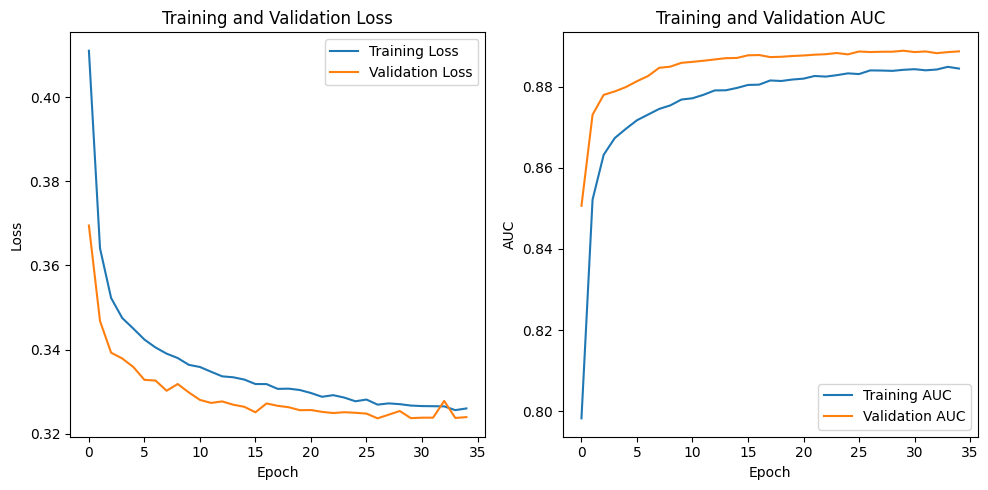

In [30]:
# Extract training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_auc = history.history['auc']
val_auc = history.history['val_auc']

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_auc, label='Training AUC')
plt.plot(val_auc, label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Predicting on test data and final outcome!

In [31]:
# Evaluating the model on test dataset
test_loss, test_auc = model.evaluate(X_test_scaled, y_test)
print(f'Test AUC: {test_auc}') 

516/516 [==============================] - 1s 2ms/step - loss: 0.3233 - auc: 0.8864
Test AUC: 0.8863645792007446


In [32]:
# Predicting the test set data points
preds = model.predict(testbanking_scaled)

3439/3439 [==============================] - 5s 1ms/step


In [33]:
testbanking_id['Exited'] = preds
testbanking_id.head()

,id,Exited
0,165034,0.016569
1,165035,0.809479
2,165036,0.037799
3,165037,0.214789
4,165038,0.347303


In [34]:
# Saving final outcome file
testbanking_id.to_csv("submission.csv", index = False)